In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kde

In [13]:
data=pd.read_table("E:/Praxis-BA-18/spiral.txt",header=None,names=['X','Y','Cluster'])

In [8]:
data.head()

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [9]:
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [14]:
data.shape

(312, 3)

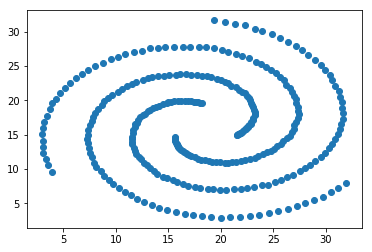

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['X'],data['Y'])

In [17]:
from sklearn.metrics import pairwise_distances

In [18]:
D=pairwise_distances(X=data[['X','Y']],n_jobs=-1)

In [20]:
D.shape

(312, 312)

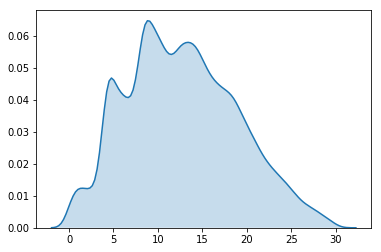

In [27]:
sns.kdeplot(data=D.flatten(),shade=True)

In [28]:
Densities=kde.gaussian_kde(dataset=D.flatten())

In [29]:
Densities(np.linspace(1,3,100))

array([ 0.01217801,  0.01221163,  0.01224273,  0.01227139,  0.01229767,
        0.01232165,  0.01234342,  0.01236306,  0.01238064,  0.01239625,
        0.01240997,  0.01242187,  0.01243203,  0.01244054,  0.01244748,
        0.01245292,  0.01245694,  0.01245961,  0.01246101,  0.01246121,
        0.01246029,  0.01245831,  0.01245535,  0.01245146,  0.01244673,
        0.0124412 ,  0.01243495,  0.01242804,  0.01242051,  0.01241245,
        0.01240389,  0.01239491,  0.01238554,  0.01237586,  0.0123659 ,
        0.01235573,  0.01234539,  0.01233495,  0.01232444,  0.01231392,
        0.01230345,  0.01229308,  0.01228286,  0.01227284,  0.01226308,
        0.01225363,  0.01224457,  0.01223594,  0.0122278 ,  0.01222024,
        0.0122133 ,  0.01220707,  0.01220161,  0.01219701,  0.01219334,
        0.0121907 ,  0.01218917,  0.01218885,  0.01218984,  0.01219225,
        0.01219618,  0.01220175,  0.0122091 ,  0.01221834,  0.01222963,
        0.01224309,  0.01225888,  0.01227717,  0.01229812,  0.01

In [32]:
max(Densities(np.linspace(1,2,100)))

0.012461255808507345

In [33]:
(np.linspace(1,2,100))[Densities(np.linspace(1,2,100))==max(Densities(np.linspace(1,2,100)))]

array([ 1.37373737])

In [34]:
(np.linspace(1,2.5,100))[Densities(np.linspace(1,2.5,100))==max(Densities(np.linspace(1,2.5,100)))]

array([ 2.5])

In [35]:
eps=1.37

In [37]:
D

array([[  0.        ,   1.03077641,   1.98494332, ...,  17.47512518,
         17.56680107,  17.60433185],
       [  1.03077641,   0.        ,   0.95524866, ...,  16.98683314,
         17.09064071,  17.13300908],
       [  1.98494332,   0.95524866,   0.        , ...,  16.63730747,
         16.75298481,  16.8000744 ],
       ..., 
       [ 17.47512518,  16.98683314,  16.63730747, ...,   0.        ,
          0.25      ,   0.35      ],
       [ 17.56680107,  17.09064071,  16.75298481, ...,   0.25      ,
          0.        ,   0.1       ],
       [ 17.60433185,  17.13300908,  16.8000744 , ...,   0.35      ,
          0.1       ,   0.        ]])

In [38]:
D1=(D>0) & (D<eps)

In [39]:
D1

array([[False,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ...,  True,  True, False]], dtype=bool)

In [40]:
pts=pd.DataFrame(D1).sum()

In [42]:
pts.head()

0    1
1    2
2    2
3    2
4    2
dtype: int64

In [43]:
pts.shape

(312,)

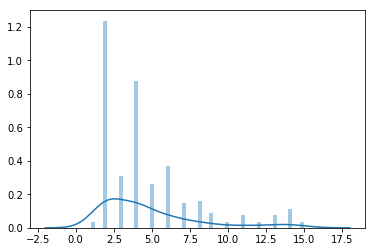

In [52]:
sns.distplot(pts,bins=54)

In [45]:
minpts=2
from sklearn.cluster import DBSCANBSCAN

In [47]:
dbs=DBSCAN(eps=eps,min_samples=minpts)

In [48]:
clus=dbs.fit_predict(data[["X","Y"]])


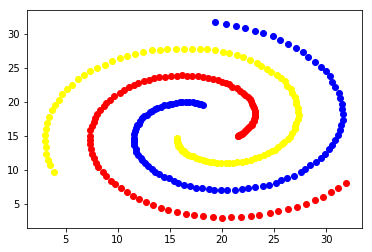

In [51]:
plt.scatter(data.iloc[clus==0,0],data.iloc[clus==0,1],c='red')
plt.scatter(data.iloc[clus==1,0],data.iloc[clus==1,1],c='blue')
plt.scatter(data.iloc[clus==2,0],data.iloc[clus==2,1],c='yellow')